In [1]:
#importing necessary packages

import tensorflow as tf
from tensorflow import keras


from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


import numpy as np
import glob
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as im
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Reading files
# It is a big Dataset. Thatswhy i am using the first 1500 from each category
expression = [cv2.imread(file) for file in glob.glob('E:/datasets/ferg/anger/*.png')[:1500]] 
expression += [cv2.imread(file) for file in glob.glob('E:/datasets/ferg/disgust/*.png')[:1500]]
expression += [cv2.imread(file) for file in glob.glob('E:/datasets/ferg/fear/*.png')[:1500]]
expression += [cv2.imread(file) for file in glob.glob('E:/datasets/ferg/happy/*.png')[:1500]]
expression += [cv2.imread(file) for file in glob.glob('E:/datasets/ferg/neutral/*.png')[:1500]]
expression += [cv2.imread(file) for file in glob.glob('E:/datasets/ferg/sad/*.png')[:1500]]
expression += [cv2.imread(file) for file in glob.glob('E:/datasets/ferg/surprise/*.png')[:1500]]

In [3]:
# Converting and checking the size of arrays 
expression=np.array(expression)
print(expression.shape)

(10500, 256, 256, 3)


In [4]:
# assigning labels
labels = np.ones((len(expression)),dtype='int64')

labels[0:1500]=0
labels[1500:3000]=1
labels[3000:4500]=2
labels[4500:6000]=3
labels[6000:7500]=4
labels[7500:9000]=5
labels[9000:]=6



print(labels)

#Converting labels into categorical
labels = np_utils.to_categorical(labels)
print(labels)

[0 0 0 ... 6 6 6]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


<function matplotlib.pyplot.show(*args, **kw)>

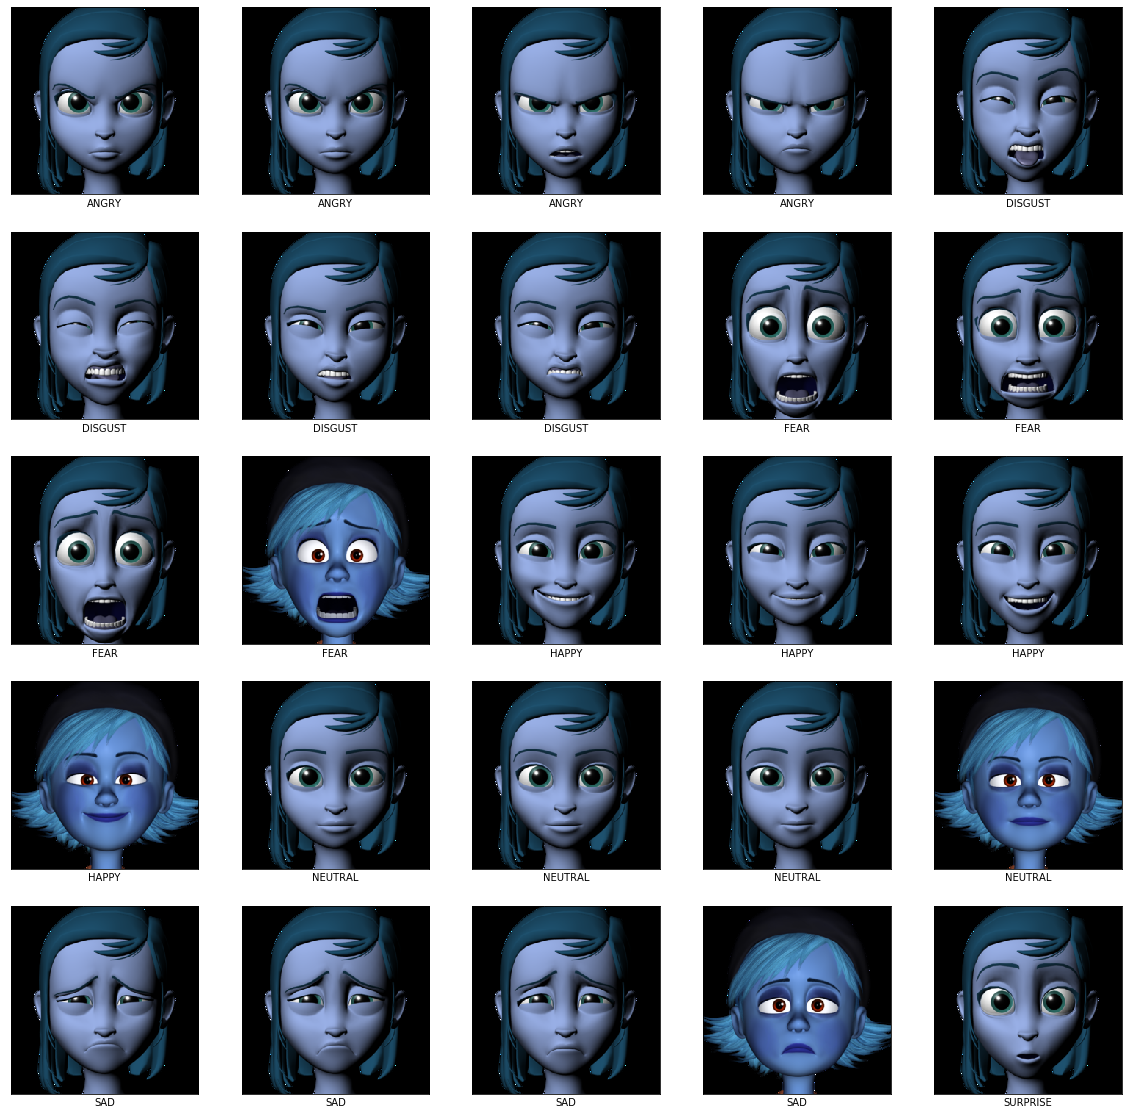

In [5]:
# PLotting
class_names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(expression[i*390])
    plt.xlabel(class_names[np.argmax(labels[i*390])])
plt.show

In [6]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(expression, labels, test_size=0.10, random_state=2)

In [7]:
#defining our model
model = keras.Sequential([
                          keras.layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(128, kernel_size=(5, 5), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Dropout(0.2),

                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(7, activation='softmax')


])

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Callbacks
earlyStopping = EarlyStopping(monitor='val_loss', patience=3)
mcp_save = ModelCheckpoint('E:/datasets/ferg/', monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)

In [10]:
history=model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_data=(x_test, y_test), shuffle=True)

Train on 9450 samples, validate on 1050 samples
Epoch 1/2
9450/9450 [==============================] - 268s 28ms/sample - loss: 0.5957 - accuracy: 0.9232 - val_loss: 3.5534e-04 - val_accuracy: 1.0000
Epoch 2/2
9450/9450 [==============================] - 263s 28ms/sample - loss: 0.0056 - accuracy: 0.9985 - val_loss: 3.7247e-05 - val_accuracy: 1.0000


1050/1 - 10s - loss: 1.9570e-05 - accuracy: 1.0000


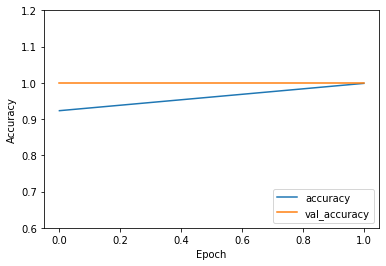

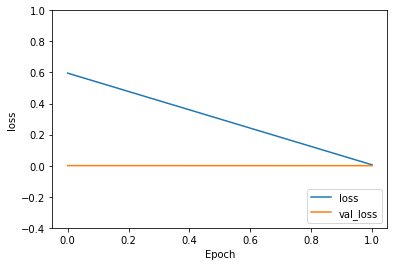

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.2])
plt.legend(loc='lower right')
plt.figure()


plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([-0.4, 1])
plt.legend(loc='lower right')
plt.figure()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [12]:
predictions = model.predict(x_test.astype(np.float32))

<function matplotlib.pyplot.show(*args, **kw)>

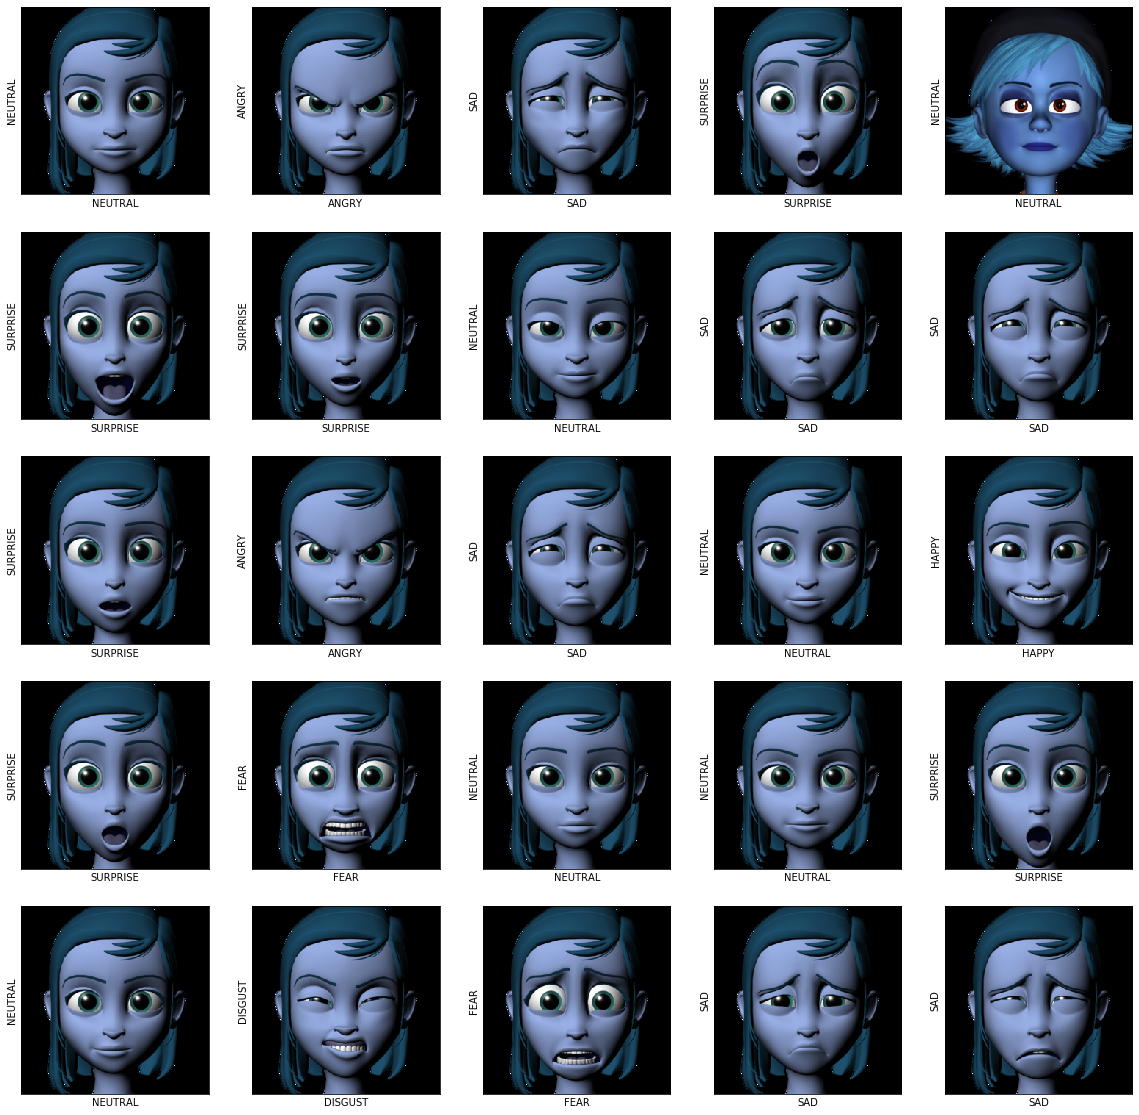

In [13]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i*3], cmap='gray')
    plt.xlabel(class_names[np.argmax(predictions[i*3])])
    plt.ylabel(class_names[np.argmax(y_test[i*3])])
plt.show

Above, we can see that my model was able to predict everything correctly from the validation set. 

- It was also reported by many others that it is very easy to acheive good accuracy on this dataset.
- Reason for using 1500 from each sentiment is because of low computational resources at the moment.